In [12]:
pip uninstall scikit-learn imbalanced-learn -y

Found existing installation: scikit-learn 1.1.3
Uninstalling scikit-learn-1.1.3:
  Successfully uninstalled scikit-learn-1.1.3
Found existing installation: imbalanced-learn 0.10.1
Uninstalling imbalanced-learn-0.10.1:
  Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl.metadata (8.2 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from nltk.util import ngrams
from textblob import TextBlob
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, LSTM, SimpleRNN, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, StandardScaler

2025-04-15 01:43:21.272446: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744681401.460031      83 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744681401.514041      83 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [15]:
df=pd.read_csv('/kaggle/input/toxic-language/DATASET/train.csv')
test=pd.read_csv('/kaggle/input/toxic-language/DATASET/test.csv')

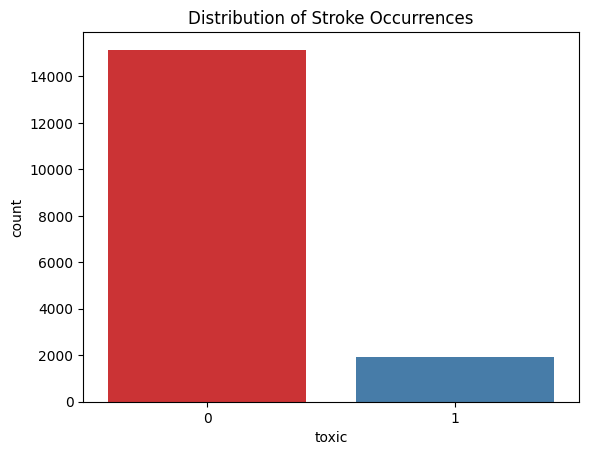

In [39]:
sns.countplot(x='toxic', data=df, palette='Set1')
plt.title('Distribution of Stroke Occurrences')
plt.show()

In [22]:
test.lang.unique()

array(['tr', 'it', 'fr', 'pt', 'es', 'ru'], dtype=object)

**The train data only has English Language but the test set contains 6 other languages but not English. So, this set can't be used for evaluation**

# Cleaning Data (Dropping rows that doesn't have any letter)

In [17]:
df = df[df['feedback_text'].str.match(r'.*[a-zA-Z].*', na=False)]

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Exploratory Data Analysis (EDA)

In [29]:
df['text_length'] = df['feedback_text'].str.len()

print("\nBasic Statistics:")
print(f"Total feedback entries: {len(df)}")
print(f"Average text length: {df['text_length'].mean():.1f} characters")
print(f"Shortest feedback: {df['text_length'].min()} characters")
print(f"Longest feedback: {df['text_length'].max()} characters")
print(f"Median length: {df['text_length'].median():.1f} characters")


Basic Statistics:
Total feedback entries: 17068
Average text length: 308.2 characters
Shortest feedback: 6 characters
Longest feedback: 5000 characters
Median length: 165.0 characters


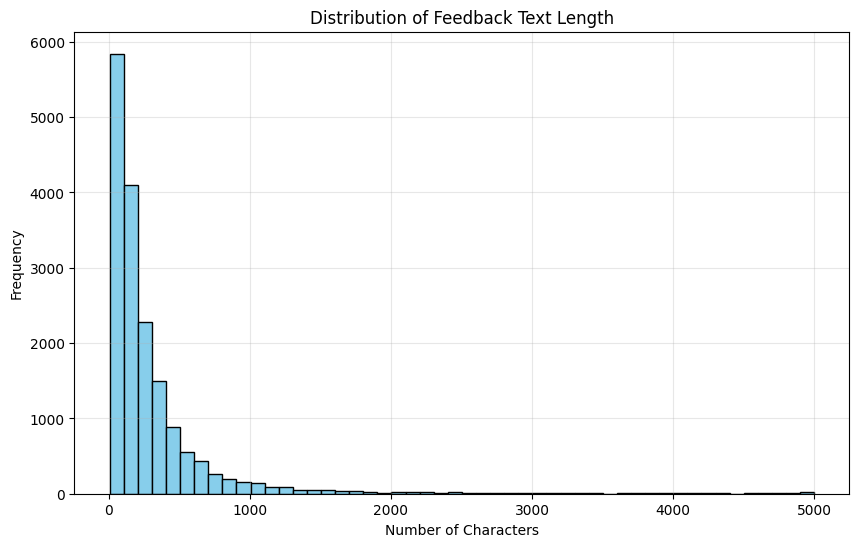

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Feedback Text Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

all_text = ' '.join(df['feedback_text'].dropna().astype(str))
processed_text = preprocess_text(all_text)

words = processed_text.split()
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]


Top 20 Most Common Words:
article: 4623
page: 3603
like: 2794
wikipedia: 2633
would: 2419
please: 2372
one: 2239
dont: 2237
talk: 1963
know: 1782
think: 1714
see: 1703
also: 1639
people: 1585
edit: 1456
articles: 1396
time: 1337
thanks: 1293
get: 1196
may: 1141


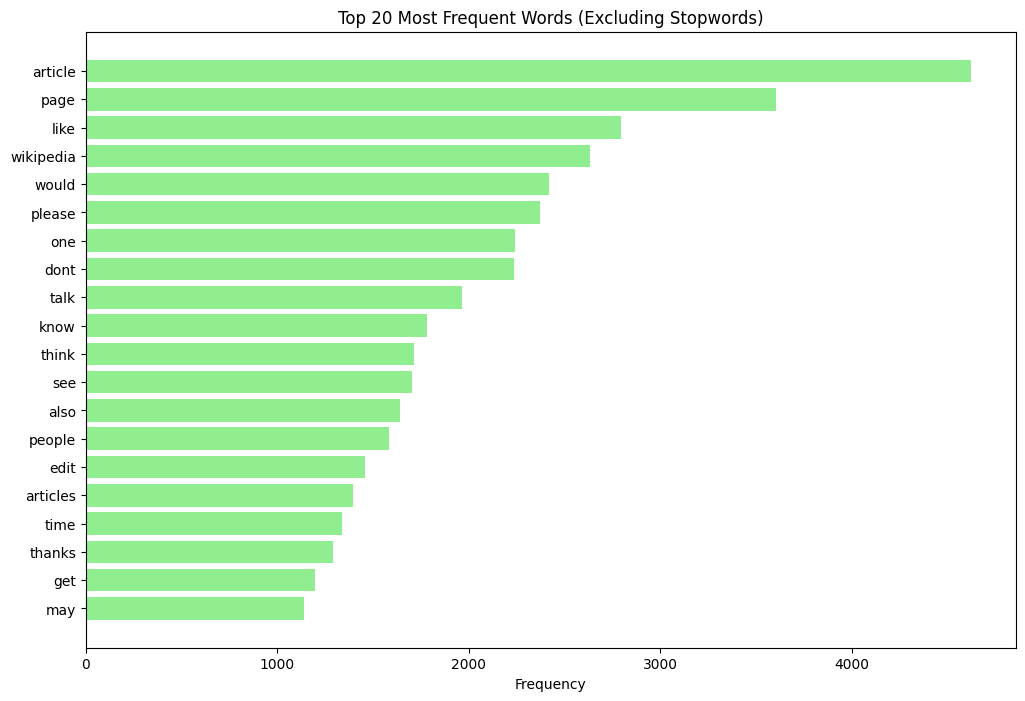

In [31]:
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(20)

print("\nTop 20 Most Common Words:")
for word, count in top_words:
    print(f"{word}: {count}")


plt.figure(figsize=(12, 8))
plt.barh([w[0] for w in top_words], [w[1] for w in top_words], color='lightgreen')
plt.title('Top 20 Most Frequent Words (Excluding Stopwords)')
plt.xlabel('Frequency')
plt.gca().invert_yaxis() 
plt.show()

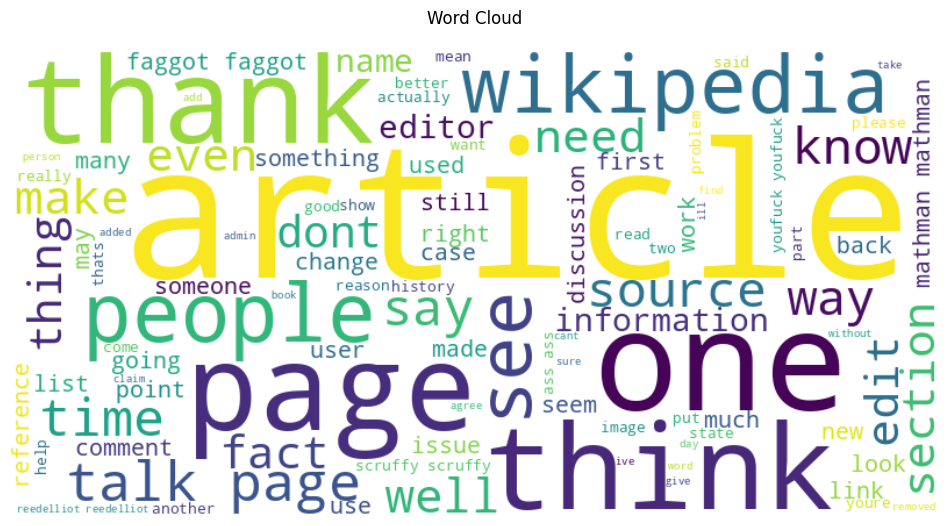

In [33]:
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white',
                      max_words=100,
                      colormap='viridis').generate(' '.join(filtered_words))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud', pad=20)
plt.show()

In [34]:
def get_ngrams(text, n=2):
    tokens = text.split()
    return list(ngrams(tokens, n))

# Get bigrams
bigrams = get_ngrams(processed_text, 2)
bigram_counts = Counter(bigrams)
top_bigrams = bigram_counts.most_common(10)

print("\nTop 10 Most Common Bigrams:")
for bigram, count in top_bigrams:
    print(f"{' '.join(bigram)}: {count}")


Top 10 Most Common Bigrams:
of the: 3819
in the: 3490
to the: 2030
if you: 1996
it is: 1903
on the: 1818
the article: 1770
to be: 1742
is a: 1710
you are: 1598


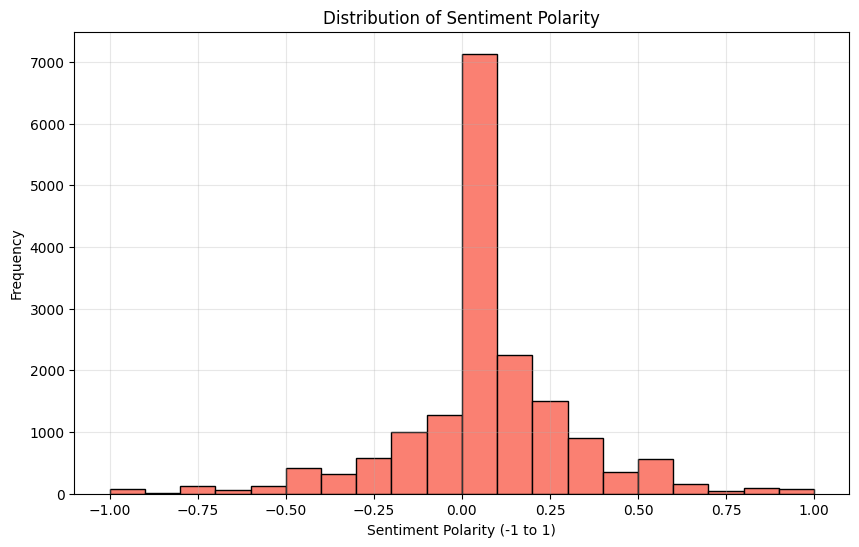


Sentiment Analysis:
Average sentiment score: 0.06
Most positive feedback: :The best way to end the debate is to recognize that the pictures will not be removed....
Most negative feedback: Abe e randve, dhanda karne ku aayelai hai kya re ? 

 Bole toh, mere ko teri gaand marne ki hai !!!!...


In [35]:
df['sentiment'] = df['feedback_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


plt.figure(figsize=(10, 6))
plt.hist(df['sentiment'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity (-1 to 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print("\nSentiment Analysis:")
print(f"Average sentiment score: {df['sentiment'].mean():.2f}")
print(f"Most positive feedback: {df.loc[df['sentiment'].idxmax(), 'feedback_text'][:100]}...")
print(f"Most negative feedback: {df.loc[df['sentiment'].idxmin(), 'feedback_text'][:100]}...")

# Stemming

In [20]:
stemmer = PorterStemmer()
df['processed_text'] = df['feedback_text'].apply(preprocess_text)
df['feedback_text'] = df['feedback_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [21]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['feedback_text'])
y = df['toxic']

# Train-Test Split & Oversampling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
smote_enn = SMOTEENN(random_state=42)
X_enn, y_enn= smote_enn.fit_resample(X_train, y_train)

# Machine Learning Models

In [28]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

print("Evaluation on Original Data:")
print("-" * 80)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print("-" * 80)




Evaluation on Original Data:
--------------------------------------------------------------------------------
Logistic Regression:
Accuracy: 0.9352, Precision: 0.9358, Recall: 0.9352, F1: 0.9247
--------------------------------------------------------------------------------
Decision Tree:
Accuracy: 0.9133, Precision: 0.9128, Recall: 0.9133, F1: 0.9130
--------------------------------------------------------------------------------
Random Forest:
Accuracy: 0.9330, Precision: 0.9325, Recall: 0.9330, F1: 0.9223
--------------------------------------------------------------------------------
Gradient Boosting:
Accuracy: 0.9317, Precision: 0.9295, Recall: 0.9317, F1: 0.9213
--------------------------------------------------------------------------------
SVM:
Accuracy: 0.9361, Precision: 0.9364, Recall: 0.9361, F1: 0.9263
--------------------------------------------------------------------------------
K-Nearest Neighbors:
Accuracy: 0.8981, Precision: 0.9021, Recall: 0.8981, F1: 0.8600
-----

In [29]:
print("\nEvaluation on SMOTEENN Resampled Data:")
print("-" * 80)
for name, model in models.items():
    model.fit(X_enn, y_enn)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")
    print("-" * 80)


Evaluation on SMOTEENN Resampled Data:
--------------------------------------------------------------------------------
Logistic Regression:
Accuracy: 0.9192, Precision: 0.9287, Recall: 0.9192, F1: 0.9228
--------------------------------------------------------------------------------
Decision Tree:
Accuracy: 0.8822, Precision: 0.9020, Recall: 0.8822, F1: 0.8901
--------------------------------------------------------------------------------
Random Forest:
Accuracy: 0.9289, Precision: 0.9230, Recall: 0.9289, F1: 0.9237
--------------------------------------------------------------------------------
Gradient Boosting:
Accuracy: 0.8998, Precision: 0.9093, Recall: 0.8998, F1: 0.9038
--------------------------------------------------------------------------------
SVM:
Accuracy: 0.9426, Precision: 0.9393, Recall: 0.9426, F1: 0.9379
--------------------------------------------------------------------------------
K-Nearest Neighbors:
Accuracy: 0.8889, Precision: 0.8741, Recall: 0.8889, F1: 0

# Deep Learning Models

In [27]:
tf.random.set_seed(42)
np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.toarray() if hasattr(X_train, 'toarray') else X_train)
X_test_scaled = scaler.transform(X_test.toarray() if hasattr(X_test, 'toarray') else X_test)
X_enn_scaled = scaler.transform(X_enn.toarray() if hasattr(X_enn, 'toarray') else X_enn)

if len(X_train_scaled.shape) == 2:
    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
    X_enn_reshaped = X_enn_scaled.reshape(X_enn_scaled.shape[0], X_enn_scaled.shape[1], 1)

def create_ffnn(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2),
        tf.keras.layers.Activation('softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_cnn(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(2),
        tf.keras.layers.Activation('softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_rnn(input_shape):
    model = Sequential([
        SimpleRNN(64, activation='relu', input_shape=input_shape),
        Dropout(0.3),
        Dense(2),
        tf.keras.layers.Activation('softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_lstm(input_shape):
    model = Sequential([
        LSTM(64, activation='tanh', input_shape=input_shape),
        Dropout(0.3),
        Dense(2),
        tf.keras.layers.Activation('softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

dl_models = {
    "Feed Forward NN": create_ffnn(X_train_scaled.shape[1]),
    "CNN": create_cnn(X_train_reshaped.shape[1:]),
    "RNN": create_rnn(X_train_reshaped.shape[1:]),
    "LSTM": create_lstm(X_train_reshaped.shape[1:])
}

def evaluate_model(model, X_train_data, y_train_data, X_test_data, y_test_data, epochs=20, batch_size=32):
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    history = model.fit(
        X_train_data, y_train_data,
        validation_data=(X_test_data, y_test_data),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=0
    )
    
    y_pred = model.predict(X_test_data, verbose=0)
    y_pred_classes =np.argmax(y_pred, axis=1)
    
    return {
        'accuracy': accuracy_score(y_test_data, y_pred_classes),
        'precision': precision_score(y_test_data, y_pred_classes, average='weighted'),
        'recall': recall_score(y_test_data, y_pred_classes, average='weighted'),
        'f1': f1_score(y_test_data, y_pred_classes, average='weighted')
    }

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print("Evaluation on Original Data:")
print("-" * 60)
for name, model in dl_models.items():
    if "FFNN" in name:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train_reshaped, X_test_reshaped
    
    metrics = evaluate_model(model, X_tr, y_train, X_te, y_test)
    
    print(f"{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, "
          f"Recall: {metrics['recall']:.4f}, F1: {metrics['f1']:.4f}")
    print("-" * 60)

Evaluation on Original Data:
------------------------------------------------------------
Feed Forward NN:
Accuracy: 0.9233, Precision: 0.9175, Recall: 0.9233, F1: 0.9112
------------------------------------------------------------
CNN:
Accuracy: 0.9225, Precision: 0.9183, Recall: 0.9225, F1: 0.9085
------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


RNN:
Accuracy: 0.8871, Precision: 0.7870, Recall: 0.8871, F1: 0.8341
------------------------------------------------------------


In [ ]:
print("\nEvaluation on SMOTEENN Resampled Data:")
print("-" * 60)
for name, model in dl_models.items():
    if "FFNN" in name:
        model = create_ffnn(X_train_scaled.shape[1])
        X_tr, X_te = X_enn_scaled, X_test_scaled
    else:
        if "CNN" in name:
            model = create_cnn(X_train_reshaped.shape[1:])
        elif "RNN" in name:
            model = create_rnn(X_train_reshaped.shape[1:])
        else:
            model = create_lstm(X_train_reshaped.shape[1:])
        X_tr, X_te = X_enn_reshaped, X_test_reshaped
    
    metrics = evaluate_model(model, X_tr, y_enn, X_te, y_test)
    
    print(f"{name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}, Precision: {metrics['precision']:.4f}, "
          f"Recall: {metrics['recall']:.4f}, F1: {metrics['f1']:.4f}")
    print("-" * 60)


Evaluation on SMOTEENN Resampled Data:
------------------------------------------------------------
